In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Accessing

In [3]:
df = pd.read_csv('data/raw/Crop recommendation.csv')
print(df.shape)
df.head()

(2200, 8)


,Nitrogen,Phosphorus,K(Potassium),Temperature,Humidity,Ph Value,Rainfall,Crop Name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nitrogen      2200 non-null   int64  
 1   Phosphorus    2200 non-null   int64  
 2   K(Potassium)  2200 non-null   int64  
 3   Temperature   2200 non-null   float64
 4   Humidity      2200 non-null   float64
 5   Ph Value      2200 non-null   float64
 6   Rainfall      2200 non-null   float64
 7   Crop Name     2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.duplicated().sum()

0

## Data Cleaning

In [4]:
df.rename(columns={
    'Nitrogen': 'N',
    'Phosphorus': 'P',
    'K(Potassium)': 'K',
    'Ph Value': 'pH',
}, inplace=True)

# Data Vizualization

<Axes: >

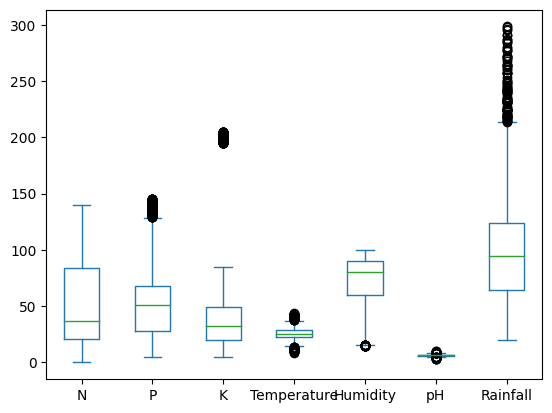

In [7]:
df.plot.box()

##### By observing the boxplot, we consider that the dataset has many ouliers which needed to be handeled.

In [11]:
df['Crop Name'].value_counts()

Crop Name
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

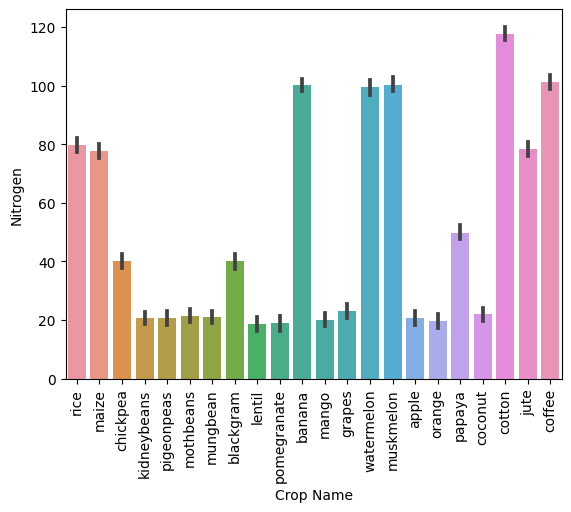

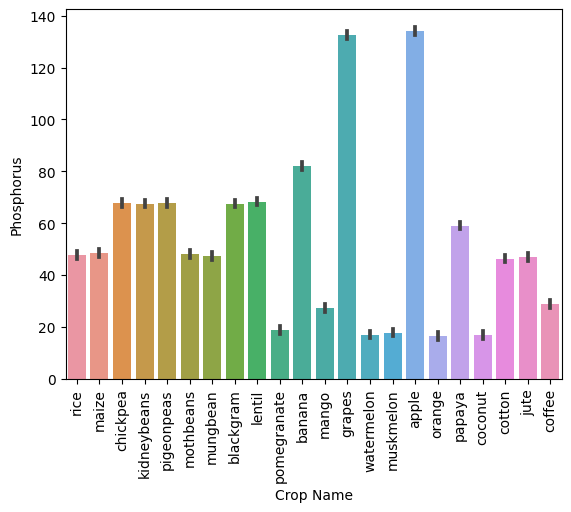

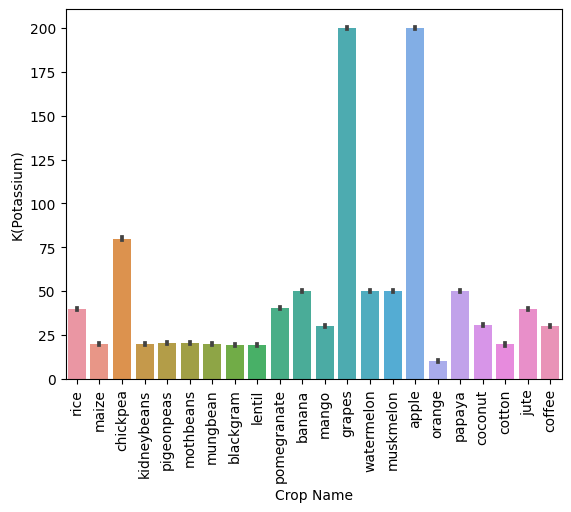

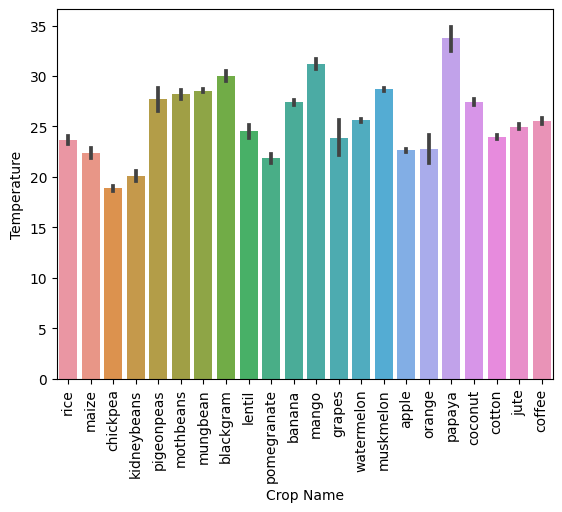

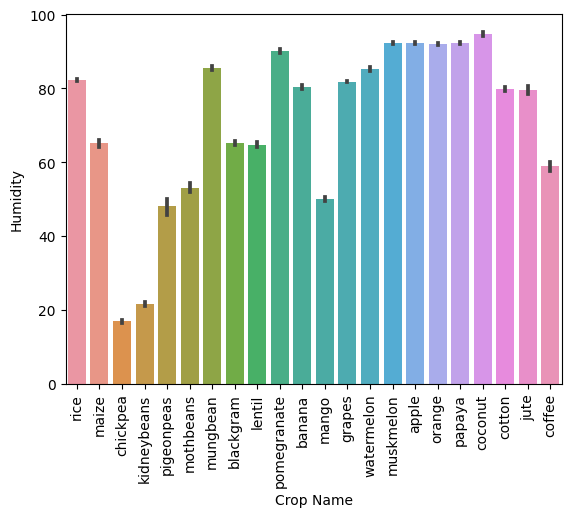

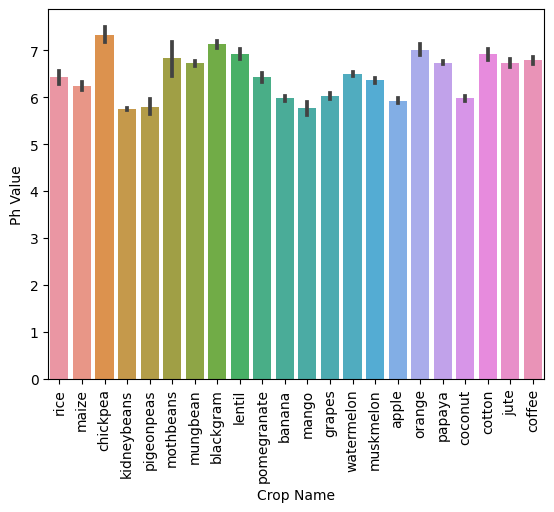

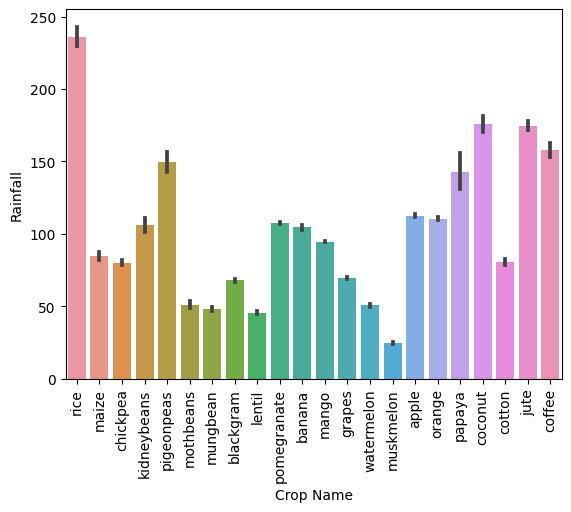

In [15]:
# Plot the graph on all the column with 'Crop Name' column.

def plot_graphs():
    for i in df.columns[:-1]:
        sns.barplot(df, x='Crop Name', y=i)
        plt.xticks(rotation=90)
        plt.show()

plot_graphs()

In [4]:
df['Rainfall'].describe()

count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: Rainfall, dtype: float64

In [16]:
df.describe()

,N,P,K,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

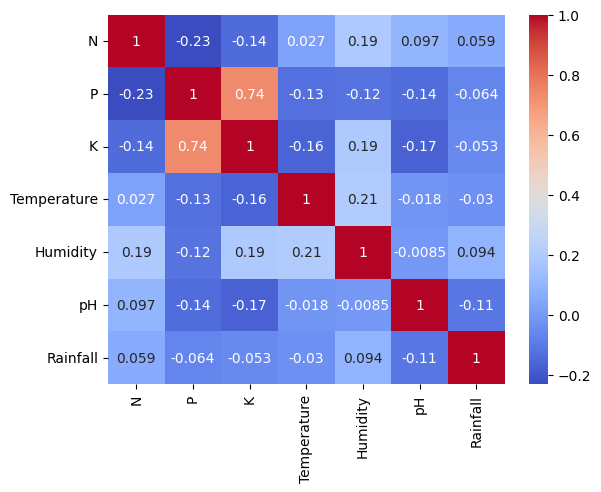

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [8]:
def outlier_capping(df: pd.DataFrame, col_name: str,
                    lower_cap: float = 0.01, upper_cap: float | None = None
                    ):
    if upper_cap is None:
        lower_lim, upper_lim = df[col_name].quantile([lower_cap, 1-lower_cap])
    else:
        lower_lim, upper_lim = df[col_name].quantile([lower_cap, upper_cap])

    print(lower_lim, upper_lim)

    print('No. of rows affected by the outlier detection',
        df[(df[col_name]>=upper_lim) | (df[col_name] <= lower_lim)].shape
        )

    sns.histplot(df[col_name], kde=True)
    plt.show()

    new_dist = np.where(
        df[col_name] >= upper_lim, upper_lim,
        np.where(
            df[col_name] <= lower_lim, lower_lim,
            df[col_name])
    )
    sns.histplot(new_dist, kde=True)
    plt.show()
    sns.boxplot(new_dist)

10.0 133.0
No. of rows affected by the outlier detection (236, 8)


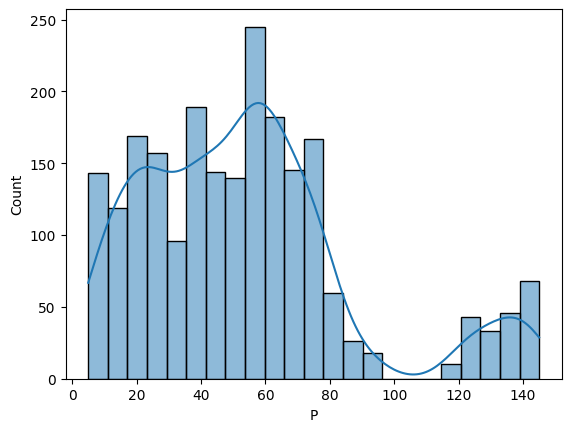

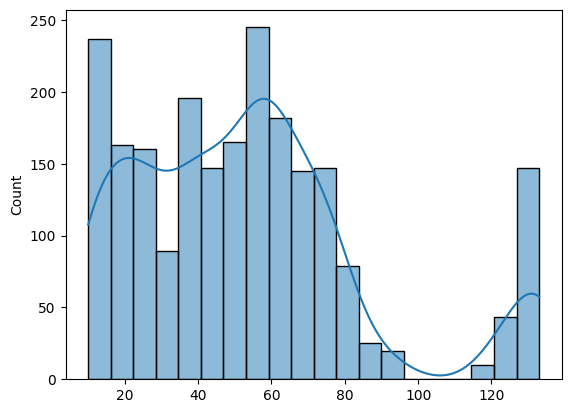

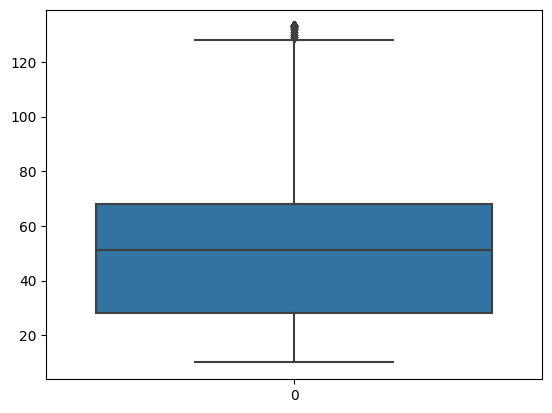

In [15]:
outlier_capping(df, 'P', 0.05)

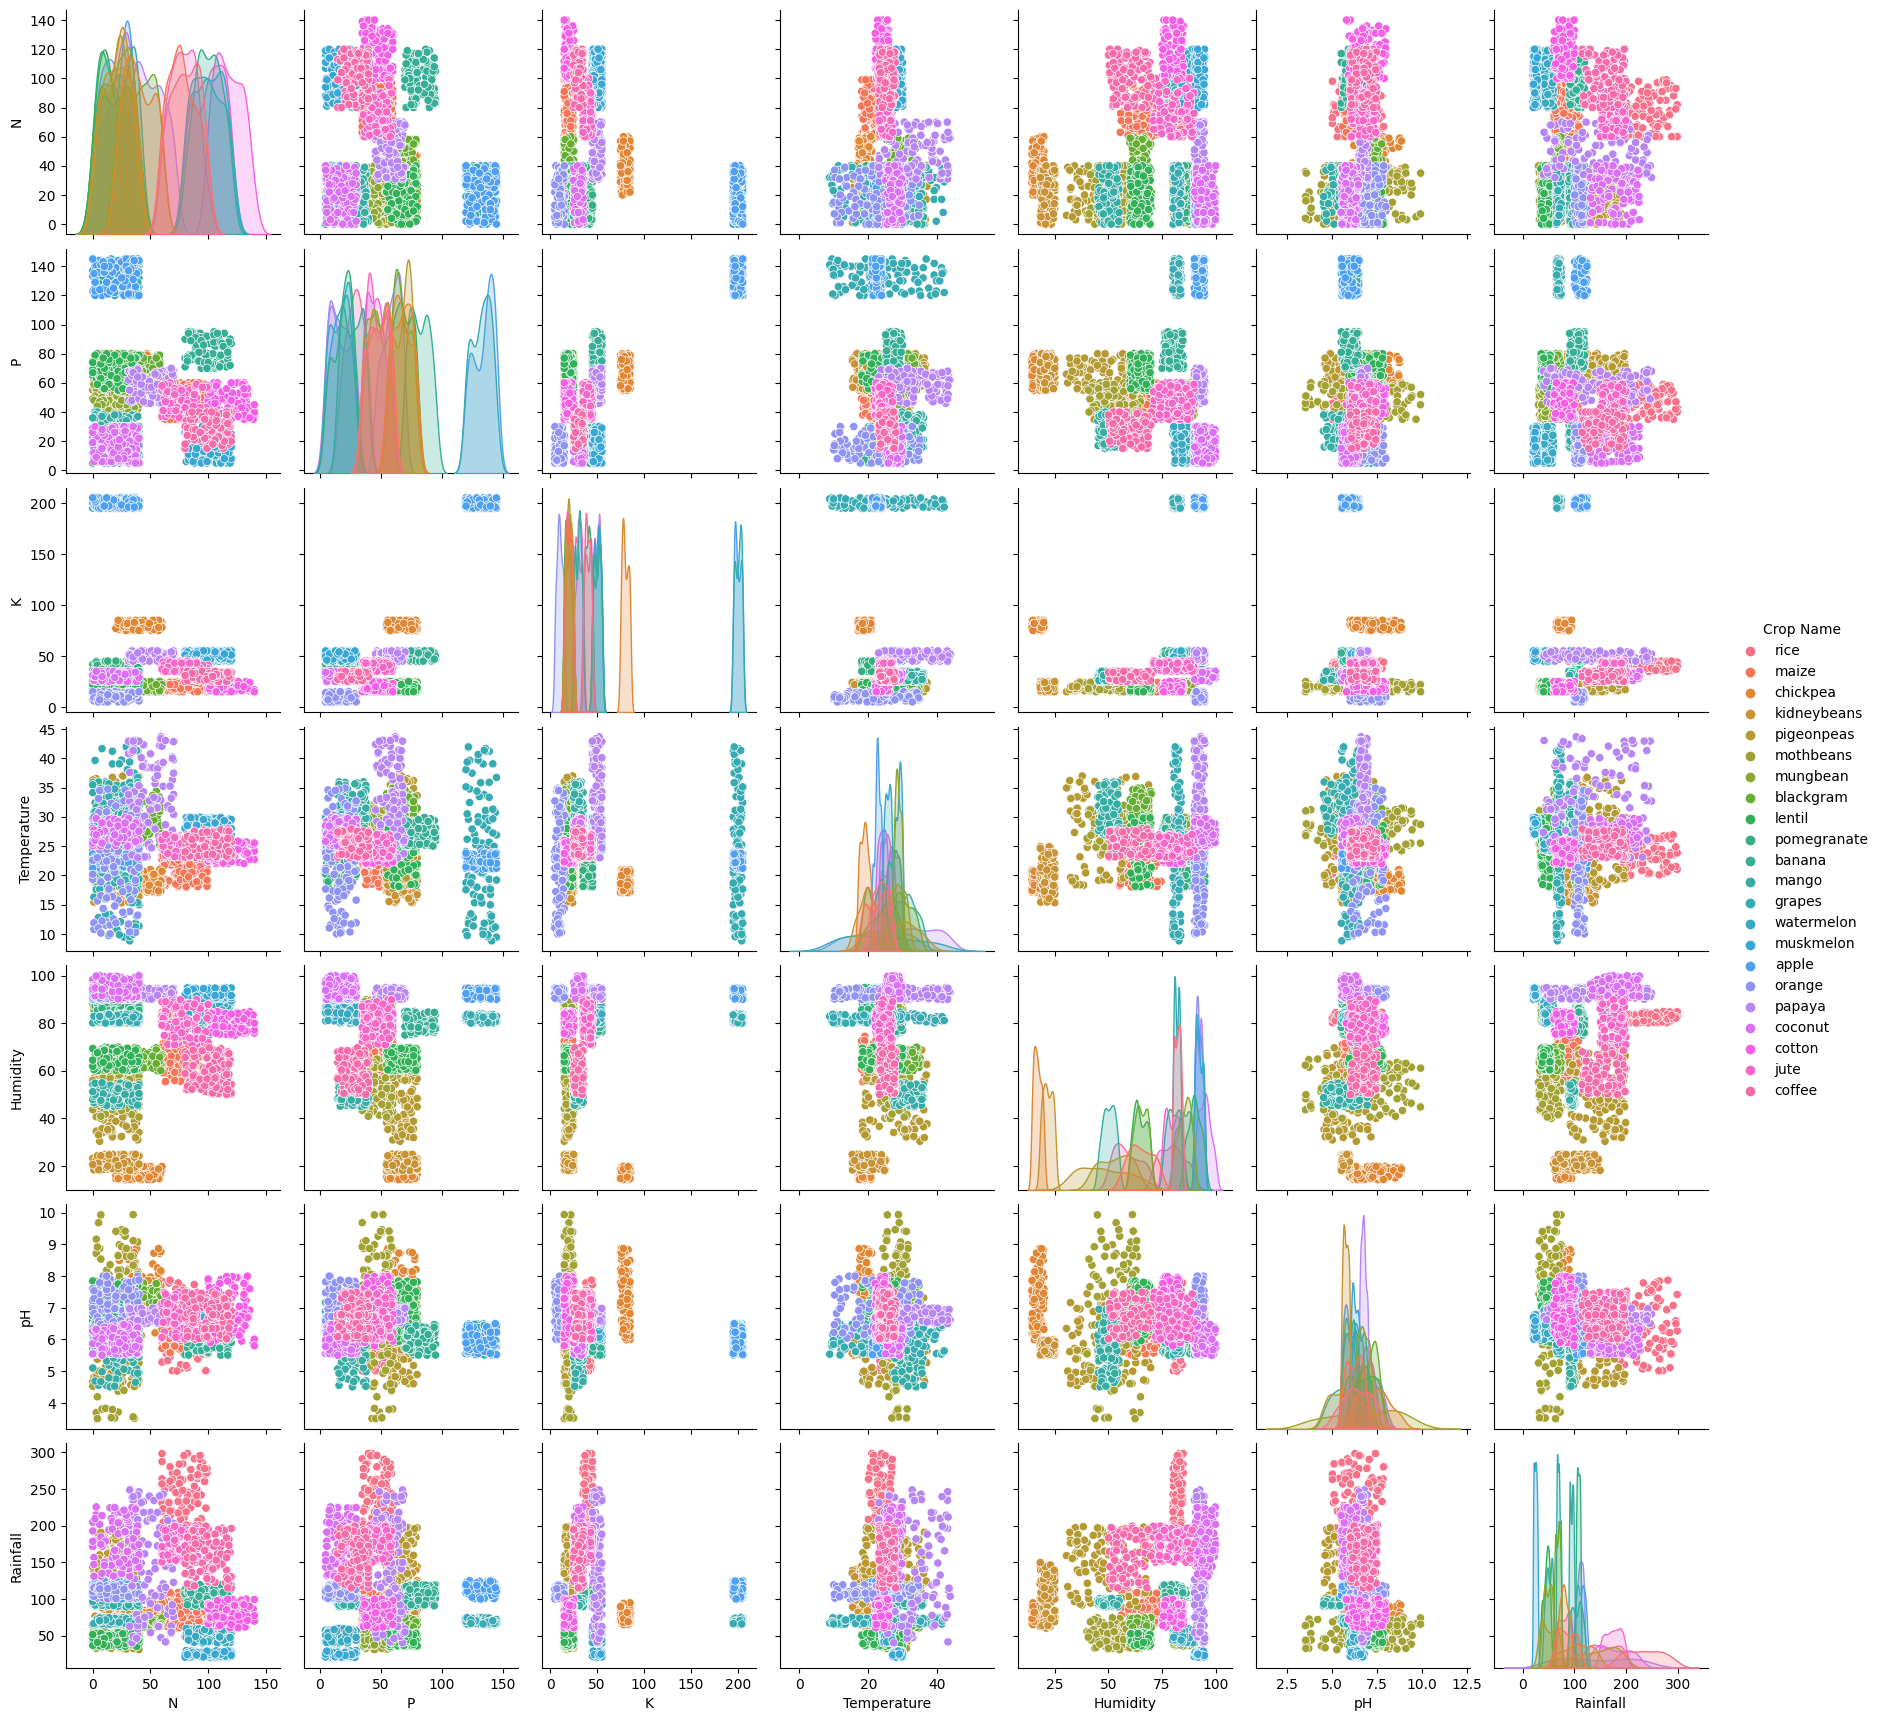

In [21]:
sns.pairplot(df, hue='Crop Name')

**As you can see here:**

1. There are no outliers in data.
2. All the **crops** are _very gently scatter_ in the graph which makes easy to train the model.

In [22]:
df.sample(10)

,N,P,K,Temperature,Humidity,pH,Rainfall,Crop Name
1463,84,29,49,29.943492,93.907412,6.251420,20.390205,muskmelon
575,27,59,20,28.009374,52.609500,4.397699,36.012030,mothbeans
199,83,57,19,25.730444,70.747393,6.877869,98.737713,maize
145,96,46,22,20.583140,69.001286,6.499936,66.293904,maize
1660,31,25,12,18.051424,90.039696,7.016482,111.779389,orange
2032,67,60,38,24.798530,78.530371,7.162143,162.284743,jute
380,32,79,15,23.909101,20.746193,5.706199,81.602112,kidneybeans
1402,101,25,52,29.099104,94.222378,6.750146,22.524973,muskmelon
955,27,24,41,24.327701,90.882928,6.610251,110.460646,pomegranate
506,14,55,15,27.335809,55.277559,8.050304,73.447753,mothbeans
